In [89]:
import numpy as np
from matplotlib import pyplot as plt

In [90]:
def rock_line(a,b):
    a, b=np.array(a), np.array(b)
    return np.linspace(a,b,max(np.abs(a-b)+1)).astype(int)

In [130]:
# np.unique(ocupied_indecies, axis=0)
ocupied_indecies = np.array([[]])
input = open('p14.txt', mode='r')
for line in input.readlines():
    line = line.strip('\n').split(' -> ')

    rock=[list(map(int,x.split(','))) for x in line]
    
    for i in range(len(rock)-1):
        try:
            ocupied_indecies = np.concatenate([ocupied_indecies,rock_line(rock[i], rock[i+1])], axis=0)
        except ValueError:
            ocupied_indecies = rock_line(rock[i], rock[i+1])
Map_indexes = np.unique(ocupied_indecies, axis=0)

In [131]:
ymin, xmin = 0, Map_indexes.T[0].min()-1
ymax, xmax = Map_indexes.T[1].max()+1, Map_indexes.T[0].max()+1

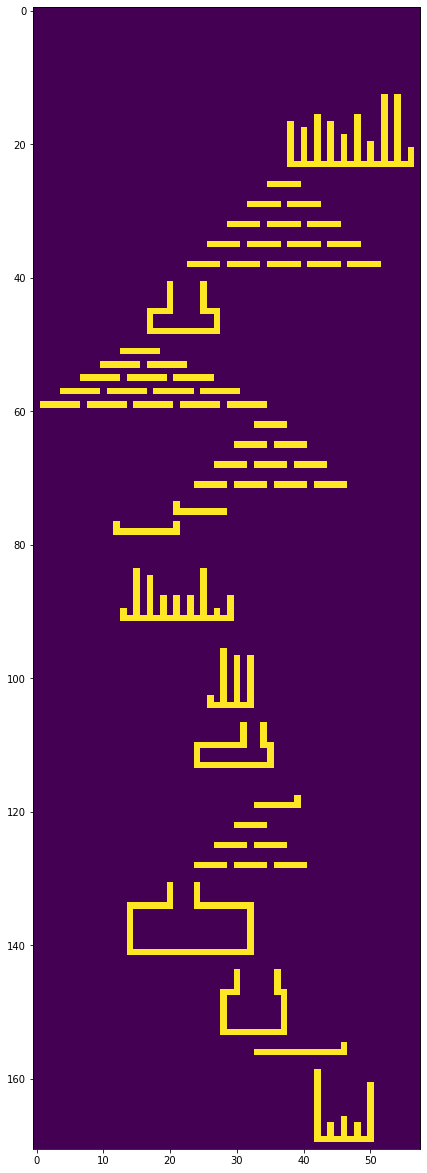

In [134]:
plt.figure(figsize=(7, 21))
Map = np.zeros([ymax-ymin+1,xmax-xmin+1])
Map[Map_indexes.T[1]-ymin,Map_indexes.T[0]-xmin] = 10
plt.imshow(Map)

In [135]:
def step(Map, start=np.array([500-xmin,0])):
    if start[1]==ymax: return True

    shifts = [[0,1], [-1,1], [1,1]]
    for shift in shifts:
        pos = start+shift
        # print(pos)
        if Map[pos[1],pos[0]]==0:
            return step(Map, start=np.array(pos))
    Map[start[1], start[0]] = 5
    return False

In [136]:
particle = 0
while not step(Map):
    particle += 1
particle

728

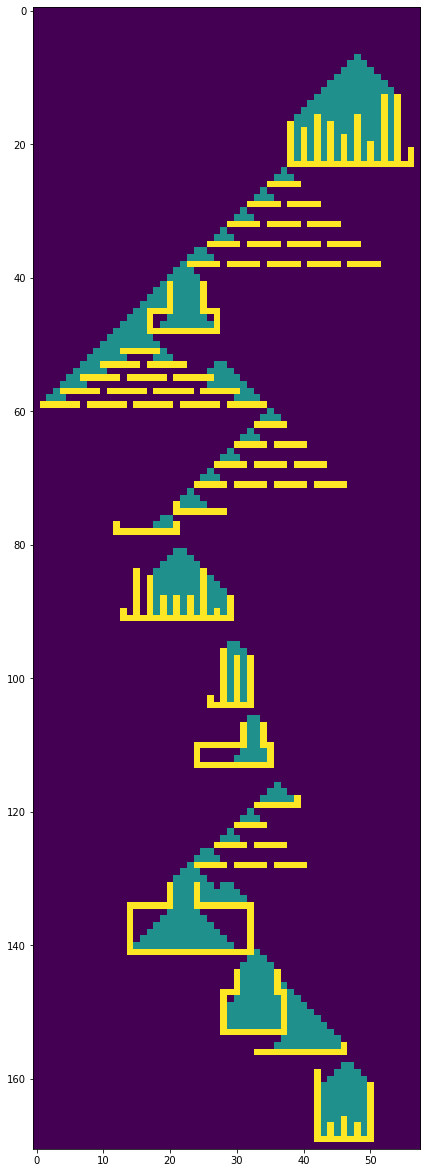

In [139]:
plt.figure(figsize=(7, 21))
plt.imshow(Map)

In [ ]:
# class map_iterator(object):
#     def __init__(self, points, M,max_dist=100):
#         self.M = M
#         self.points, self.distance, self.M = form_map(points,0,M)
#         self.max_dist = max_dist
    
#     def __iter__(self):
#         return self
    
#     def __next__(self):
#         return self.next()
#     def next(self):
#         if self.distance < self.max_dist:
#             if not self.distance%10:
#                 print(self.distance, self.max_dist)
#             self.points, self.distance, self.M = form_map(self.points, self.distance, self.M)
            
#             return self.M
#         raise StopIteration()

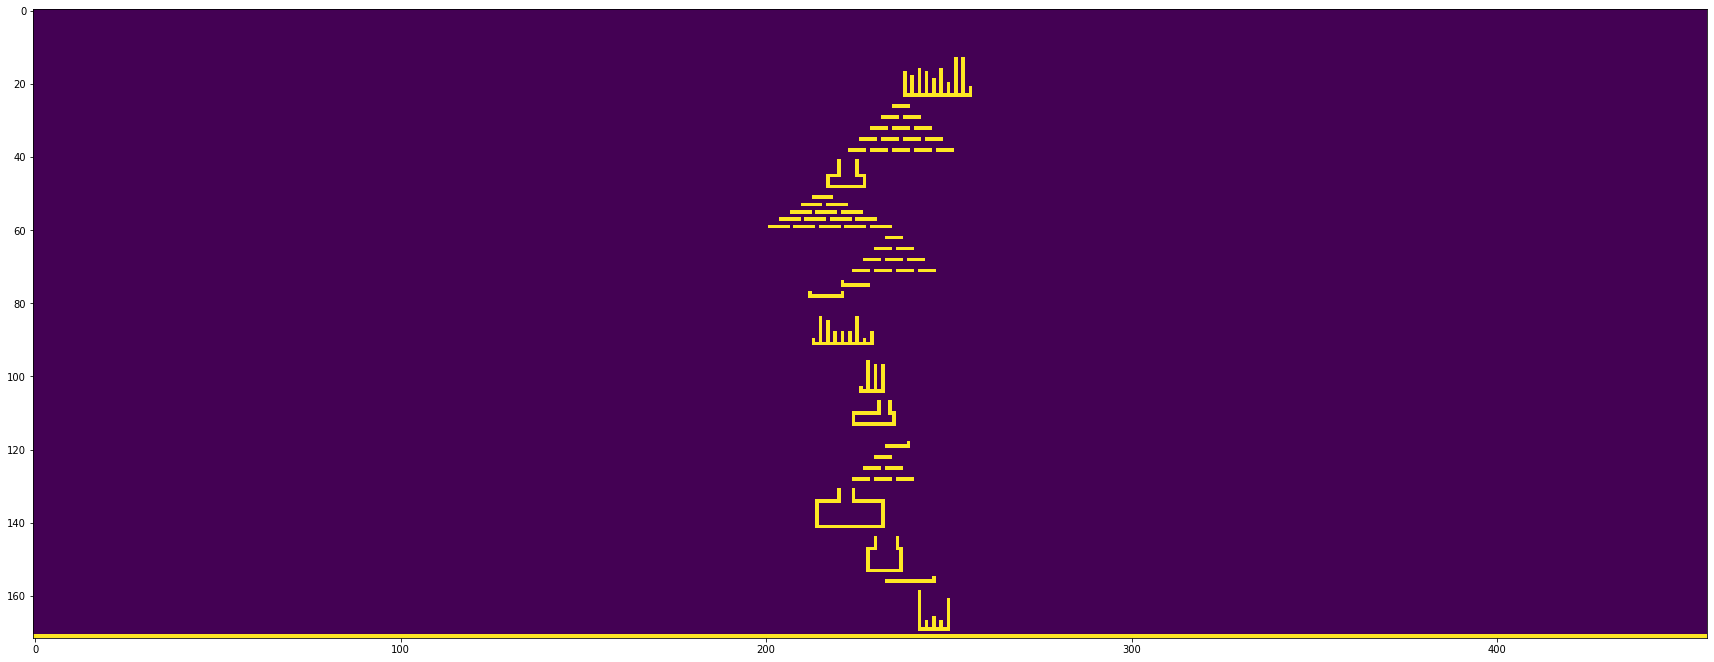

In [149]:

ymin, xmin = 0, Map_indexes.T[0].min()-1-200
ymax, xmax = Map_indexes.T[1].max()+2, Map_indexes.T[0].max()+1+200

Map = np.zeros([ymax-ymin+1,xmax-xmin+1])
Map[Map_indexes.T[1]-ymin,Map_indexes.T[0]-xmin] = 10

Map[-1,:]=10
plt.figure(figsize=(30, 15))
plt.imshow(Map)

In [150]:
def step(Map, start=np.array([500-xmin,0])):

    shifts = [[0,1], [-1,1], [1,1]]
    for shift in shifts:
        pos = start+shift
        # print(pos)
        if Map[pos[1],pos[0]]==0:
            return step(Map, start=np.array(pos))
    Map[start[1], start[0]] = 5
    return start[1]==0

In [151]:
particle = 1
while not step(Map):
    particle += 1
particle

27622

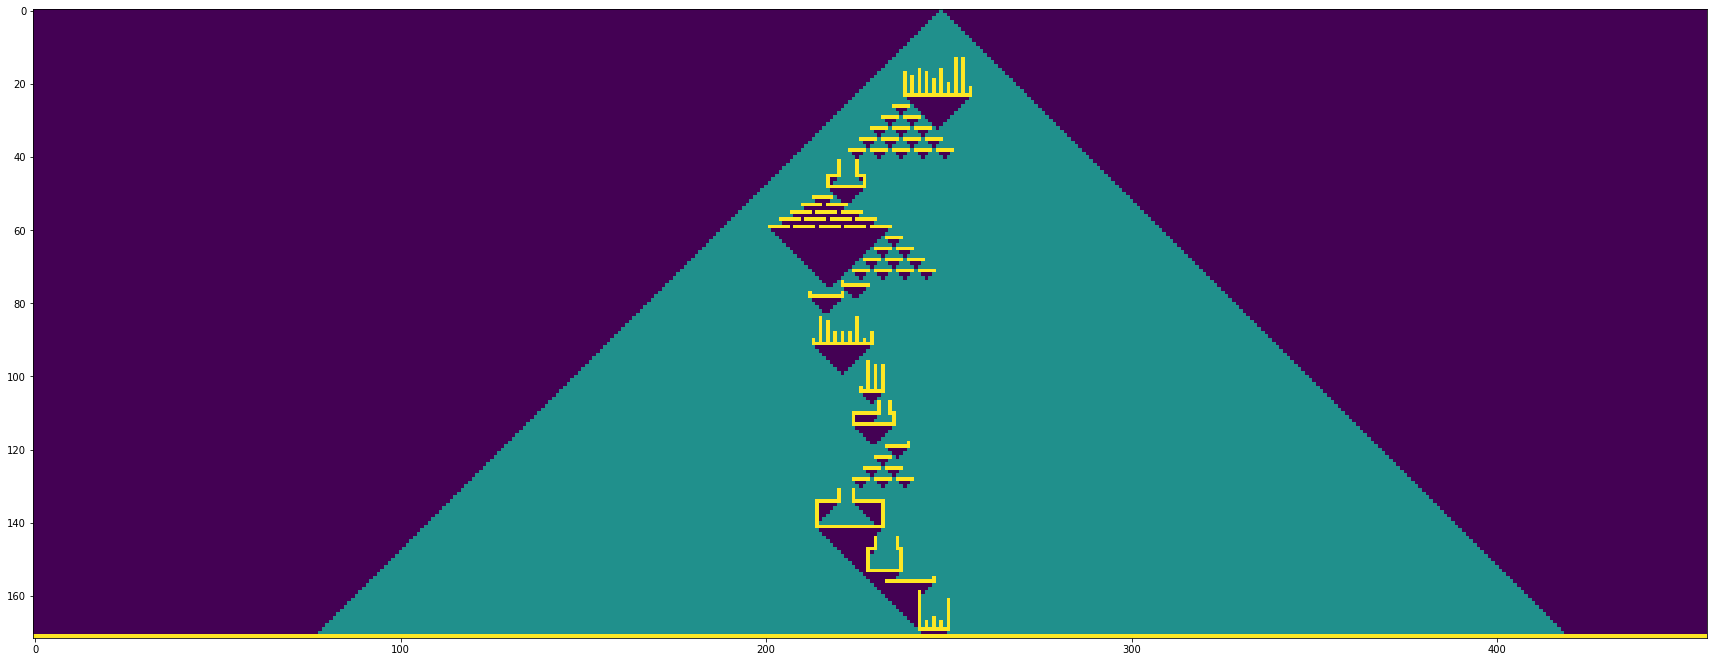

In [152]:
plt.figure(figsize=(30, 15))
plt.imshow(Map)